<a href="https://colab.research.google.com/github/leon-czarlinski/ProfileAnalysis/blob/main/ProfileAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Profile Analysis

In this project we will cover the concept of clustering, which is a unsupervised learning algorithm that involves grouping similar data points togethes based on their characteristics. The goal of clustering is to find similarities within a dataset and group similar data points together while keeping dissimilar data points separate.

Think of this project from a business perspective. Based on the customer profile, the business can identify different clusters and customize the experience, offers, services, products, and others based on this clusterization.

## Task 1: Understand the problem statement

* What insights and profile can we get from this datase? How many women and men do we have on this dataset? What is the distribution of anual income by gender? What about by profession?
* Is there any bias in the analysis?
* How can we train an unsupervised learning algorithm that involves grouping similar data points together based on the characteristics?

The data set contains some information that will give us the answer. The dataframe has the following information:

* Customer ID
* Gender (man or woman)
* Age (in years)
* Annual income
* Spending score (0 - 100)
* Profession
* Work Experience (in years)
* Family size (>1)

## Task 2: Import libraries and datasets

To work with the data frame, we are going to import some libraries, such as pandas (used for data frame manipulation), numpy (used for numerical analysis), and matplotlib (used for data visualization as well)

We are also going to do some checks about the data frame to see if there are some information we need to be aware of it, before working with it.

In [1]:
#Data
import pandas as pd
import numpy as np

#Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

#Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Clustering Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
profile_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ProfileAnalysis/customers.csv')

In [9]:
profile_df.head(5)

,custm_id,gender,age,annual_income,spend_score,profession,work_exp,fam_size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [6]:
profile_df.isnull().sum()

custm_id          0
gender            0
age               0
annual_income     0
spend_score       0
profession       35
work_exp          0
fam_size          0
dtype: int64

## Task 3: Clean the data, treating missing points

Data integrity is the accuracy, completeness, consistency, and trustworthiness of data throughout its lifecycle. Data manipulation process involves changing the data to make it more organized and easier to read.

At this point, we discover that **35 rows** have a NaN on profession. This incomplete data that is missing in important fields can decrease productivity, innaccurate insights, or inability to complete essential analysis.

using the **.dropna()** method, we are goint to delete this rows, so we can build the analysis with a dataset with complete data.


In [8]:
null_mask = profile_df.isnull().any(axis=1)
null_rows = profile_df[null_mask]
null_rows

,custm_id,gender,age,annual_income,spend_score,profession,work_exp,fam_size
79,80,Female,49,98000,42,NaN,1,1
118,119,Female,51,84000,43,NaN,2,7
219,220,Female,59,76000,61,NaN,9,1
237,238,Male,95,36000,35,NaN,0,4
437,438,Male,76,136259,14,NaN,0,7
440,441,Female,0,57373,29,NaN,0,7
498,499,Male,95,121725,3,NaN,12,3
545,546,Female,89,107359,26,NaN,10,6
601,602,Male,61,126370,20,NaN,11,4
641,642,Male,66,121377,19,NaN,7,7


In [10]:
profile_df_cp = profile_df.copy()
profile_df_cp

,custm_id,gender,age,annual_income,spend_score,profession,work_exp,fam_size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


## Task 4: Perform exploratory data analysis

Now that we have imported the data set, defined the dataframe, imported libraries and checked the data, we achieved the prepare and process the data, so we can go on and do the analysis based on the insights that we got here.

In [11]:
profile_df_cp.dropna(inplace=True)
profile_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   custm_id       1965 non-null   int64 
 1   gender         1965 non-null   object
 2   age            1965 non-null   int64 
 3   annual_income  1965 non-null   int64 
 4   spend_score    1965 non-null   int64 
 5   profession     1965 non-null   object
 6   work_exp       1965 non-null   int64 
 7   fam_size       1965 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 138.2+ KB


In [12]:
profile_df_cp.describe()

,custm_id,age,annual_income,spend_score,work_exp,fam_size
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,1000.309924,48.894656,110616.009669,51.078880,4.092621,3.757252
std,578.443714,28.414889,45833.860195,27.977176,3.926459,1.968335
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,498.000000,25.000000,74350.000000,28.000000,1.000000,2.000000
50%,1000.000000,48.000000,109759.000000,50.000000,3.000000,4.000000
75%,1502.000000,73.000000,149095.000000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


## Task 5: Perform data visualization

Data visualization is a process of creating visual representations of data to facilitate the exploration, interpretation, and communication of paterns and relationships within the data. It is a powerful tool for understanding complex data and communicating insights effectively.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

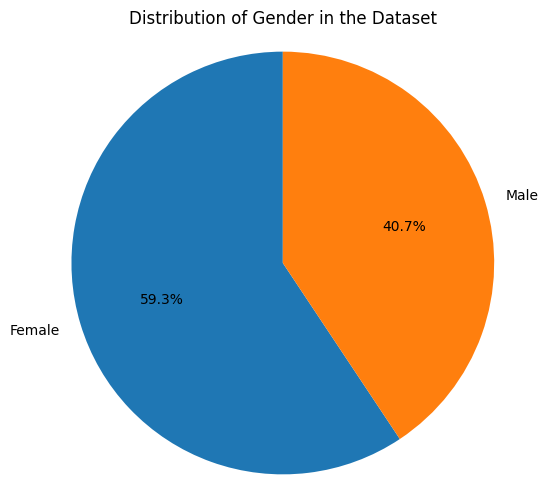

In [23]:
gender_count = profile_df_cp['gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Gender in the Dataset")
plt.axis('equal')

plt